# Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
np.random.seed(3)

## Generating Dataset

In [2]:
def generate_data(n):
    X = 2 * np.random.rand(n,1)
    Y = 4 + 3*X + np.random.rand(100,1)
    return X, Y

In [3]:
n = 100
X, Y = generate_data(n)

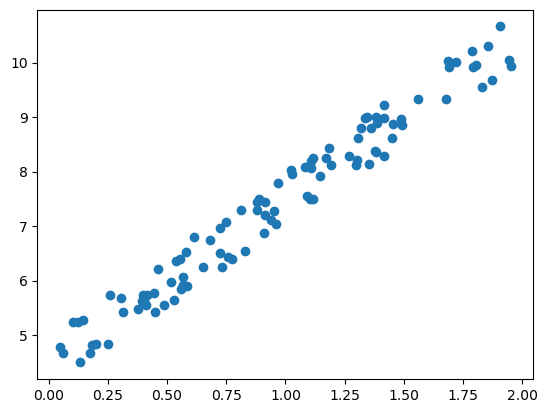

In [4]:
# Plotting the data.
plt.scatter(X, Y)
plt.show()

## Algorithm

In [5]:
def cost_function(W, X, y, y_hat, m):
    
    error = np.sum(np.square(y_hat - y))
    cost = (1/(2*m)) * error
    
    return cost

In [6]:
def gradient_descent(X, y, epochs, alpha):
    
    W = np.random.rand()
    cost_per_epoch = []

    # Running epochs.
    for i in range(epochs):
        
        # Calculating predicted output
        y_hat = np.dot(X, W)
        
        # Finding the shape of the dataset
        m  = X.shape[0]
        
        # Calculating the cost
        J = cost_function(W, X, y, y_hat, m)
        cost_per_epoch.append(J)
        
        # Updating weights
        derivative = np.sum((1/m) * X *(y_hat - y))
        W = W - (alpha * derivative)  
    
    return W, cost_per_epoch

## Using the algorithm

In [7]:
epochs = 20000

### Learning Rate = 0.1

In [8]:
alpha1 = 0.1
W1, cost_per_epoch1 = gradient_descent(X, Y, epochs, alpha1)

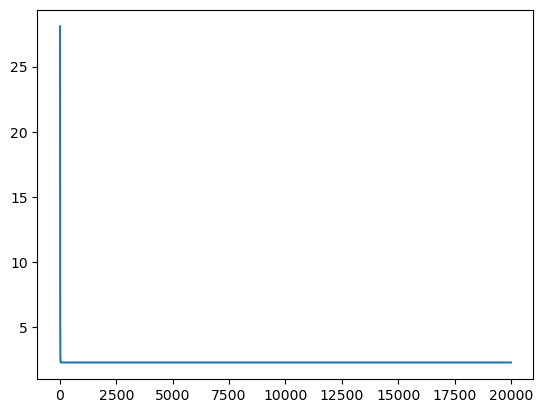

In [9]:
plt.plot(cost_per_epoch1)
plt.show()

### Learning Rate = 0.01

In [10]:
alpha2 = 0.01
W2, cost_per_epoch2 = gradient_descent(X, Y, epochs, alpha2)

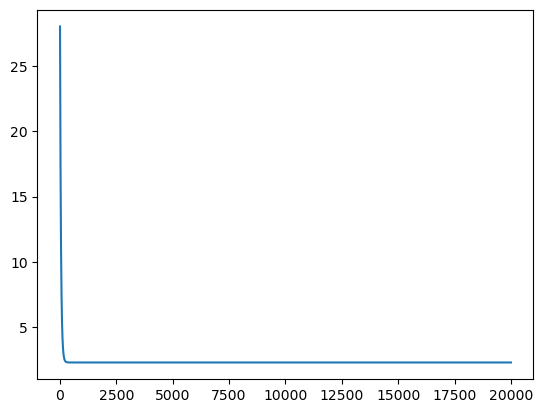

In [11]:
plt.plot(cost_per_epoch2)
plt.show()

### Learning Rate = 0.001

In [12]:
alpha3 = 0.001
W3, cost_per_epoch3 = gradient_descent(X, Y, epochs, alpha3)

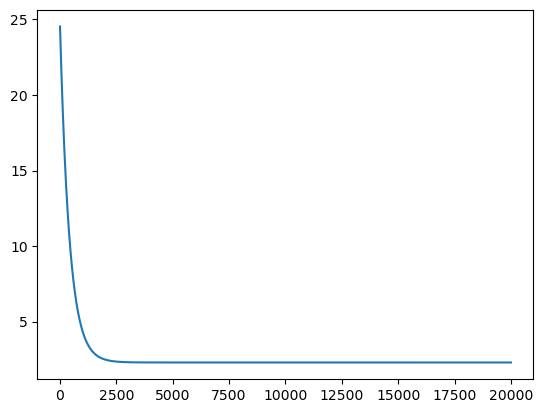

In [13]:
plt.plot(cost_per_epoch3)
plt.show()

# Stochastic Gradient Descent

## Algorithm

In [14]:
def stochastic_gradient_descent(X, y, epochs, alpha):
    # Randomly shuffling input data
    # Finding the shape of the dataset
    m  = X.shape[0]
    s = np.arange(m)
    
    W = np.random.rand()
    cost_per_epoch = []

#     j = 0
    # Running epochs.
    for i in range(epochs):
        
        # Taking one example at a time.
        j =  random.choice(s)
#         j = j%100
        
        # Calculating predicted output
        y_hat = np.dot(X[j], W)
        
        # Calculating the cost
        J = cost_function(W, X[j], y[j], y_hat, m)
        cost_per_epoch.append(J)
        
        # Updating weights
        derivative = np.sum((1/m) * X[j] *(y_hat - y[j]))
        W = W - (alpha * derivative)  
    
#         j+=1
    return W, cost_per_epoch

## Running the Algorithm

### Learning Rate = 0.1

In [15]:
W4, cost_per_epoch4 = stochastic_gradient_descent(X, Y, epochs, alpha1)

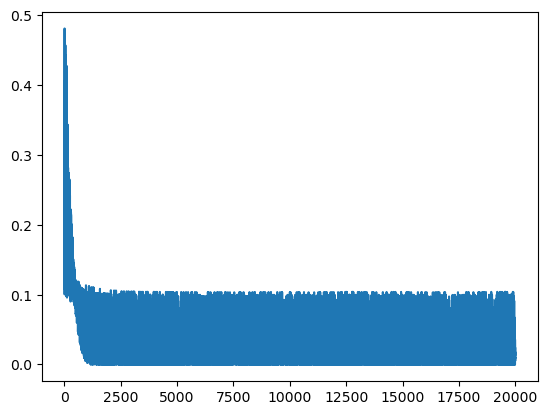

In [16]:
plt.plot(cost_per_epoch4)
plt.show()

### Learning Rate = 0.01

In [17]:
W5, cost_per_epoch5 = stochastic_gradient_descent(X, Y, epochs, alpha2)

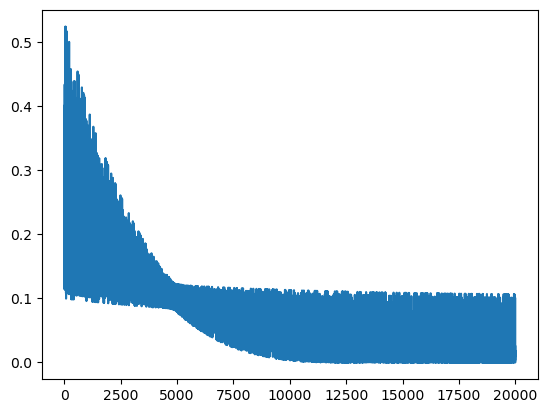

In [18]:
plt.plot(cost_per_epoch5)
plt.show()

### Learning Rate = 0.001

In [19]:
W6, cost_per_epoch6 = stochastic_gradient_descent(X, Y, epochs, alpha3)

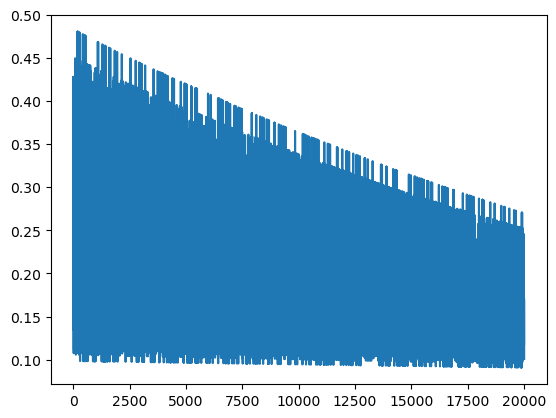

In [20]:
plt.plot(cost_per_epoch6)
plt.show()

# Mini-batch Gradient Descent

## Algorithm

In [21]:
def minibatch_gradient_descent(X, y, epochs, alpha, batch):
    
    # Taking batches instead of the entire dataset
    # Finding the shape of the dataset
    m  = X.shape[0]
    
    if batch > m:
        print(' Batch size out of bound')
        return 0,[]

    W = np.random.rand()
    cost_per_epoch = []

    j = 0
    k = batch
    # Running epochs.
    for i in range(epochs):

        # Defining the batch sizes
        j = j%m
        k = k%m
        
        # Calculating predicted output
        y_hat = np.dot(X[j:k], W)
        
        # Calculating the cost
        J = cost_function(W, X[j:k], y[j:k], y_hat, m)
        cost_per_epoch.append(J)
        
        # Updating weights
        derivative = np.sum((1/m) * X[j:k] *(y_hat - y[j:k]))
        W = W - (alpha * derivative)
        
        j += batch
        k += batch
    
    return W, cost_per_epoch

## Running the Algorithm

### Learning Rate = 0.1

In [22]:
W7, cost_per_epoch7 = minibatch_gradient_descent(X, Y, epochs, alpha1, batch = 5)

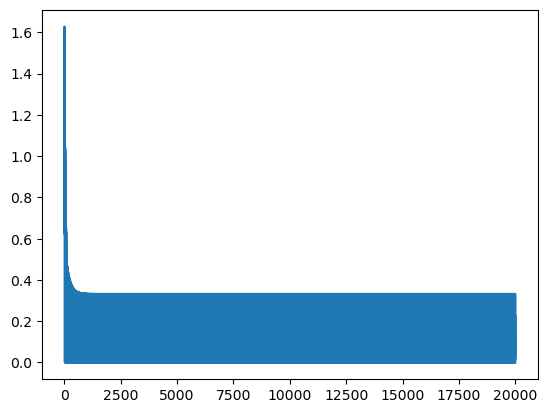

In [23]:
plt.plot(cost_per_epoch7)
plt.show()

### Learning Rate = 0.01

In [24]:
W8, cost_per_epoch8 = minibatch_gradient_descent(X, Y, epochs, alpha2, batch = 5)

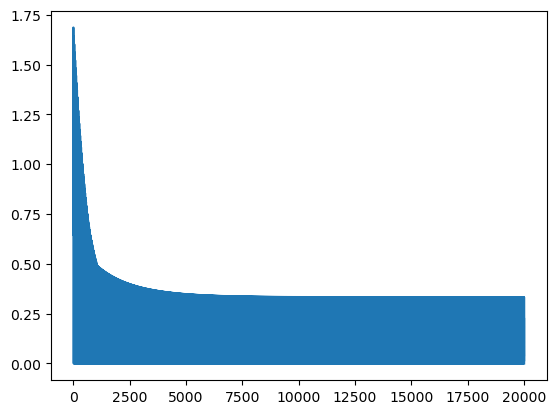

In [25]:
plt.plot(cost_per_epoch8)
plt.show()

### Learning Rate = 0.001

In [26]:
W9, cost_per_epoch9 = minibatch_gradient_descent(X, Y, epochs, alpha3, batch = 5)

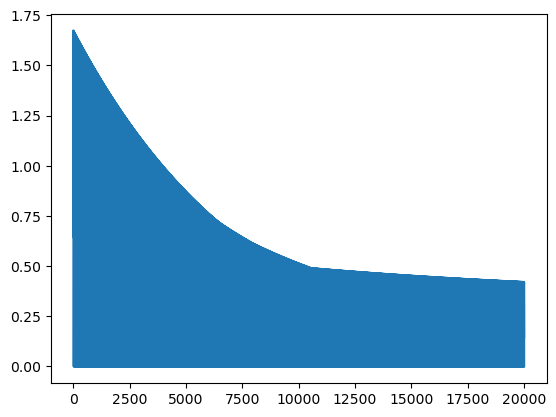

In [27]:
plt.plot(cost_per_epoch9)
plt.show()